# Convolutional Neural Network Architecture

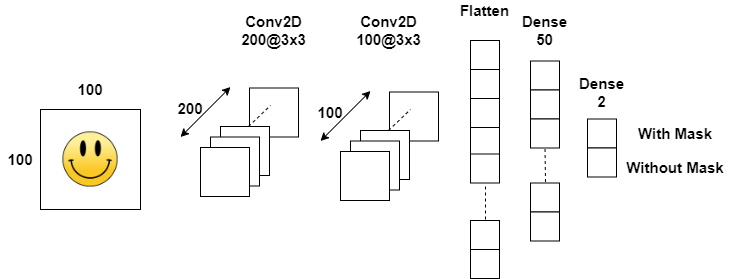

In [18]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

# model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Conv2D(200, (3, 3), input_shape=(224, 224, 1)))  # Update input shape to match 224x224 and grayscale (1 channel)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [24]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
# history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

from tensorflow.keras.callbacks import ModelCheckpoint

# Corrected checkpoint file extension
checkpoint = ModelCheckpoint(
    'model-{epoch:03d}.keras',  # Use .keras extension
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto'
)

# Fit the model
history = model.fit(
    train_data,
    train_target,
    epochs=20,
    callbacks=[checkpoint],
    validation_split=0.2
)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.5439 - loss: 1.0233 - val_accuracy: 0.6976 - val_loss: 0.6141
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.6927 - loss: 0.5682 - val_accuracy: 0.8266 - val_loss: 0.4168
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.8438 - loss: 0.3567 - val_accuracy: 0.8347 - val_loss: 0.2988
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9084 - loss: 0.2398 - val_accuracy: 0.9153 - val_loss: 0.2383
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9562 - loss: 0.1474 - val_accuracy: 0.9315 - val_loss: 0.1738
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9615 - loss: 0.1172 - val_accuracy: 0.9315 - val_loss: 0.1823
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9732 - loss: 0.0898 - val_accuracy: 0.9476 - val_loss: 0.1642
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9787 - loss: 0.0654 - val_accuracy: 0.9516 - v

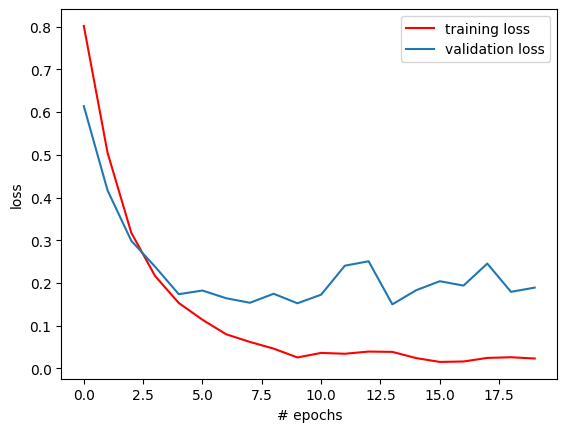

In [26]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

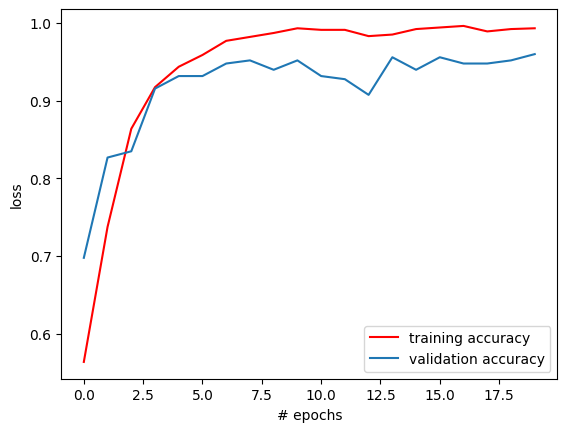

In [28]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - accuracy: 0.8866 - loss: 0.3803
[0.32462629675865173, 0.9057971239089966]
